In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab_Notebooks/CNN_Work/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:00<00:00, 190MB/s]
100% 163M/163M [00:00<00:00, 185MB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  drive  face-mask-dataset.zip  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_501.jpg', 'with_mask_1679.jpg', 'with_mask_2411.jpg', 'with_mask_276.jpg', 'with_mask_1789.jpg']
['with_mask_1979.jpg', 'with_mask_472.jpg', 'with_mask_862.jpg', 'with_mask_1221.jpg', 'with_mask_3565.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2829.jpg', 'without_mask_2428.jpg', 'without_mask_1017.jpg', 'without_mask_1300.jpg', 'without_mask_1013.jpg']
['without_mask_2211.jpg', 'without_mask_1809.jpg', 'without_mask_1397.jpg', 'without_mask_2178.jpg', 'without_mask_355.jpg']


In [ ]:
print('length of masked images',len(with_mask_files))
print('length of without mask images',len(without_mask_files))

length of masked images 3725
length of without mask images 3828


In [ ]:
# label for wearing mask 1
# label for without wearing mask 2

with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels=with_mask_labels+without_mask_labels
len(labels)

7553

In [ ]:
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


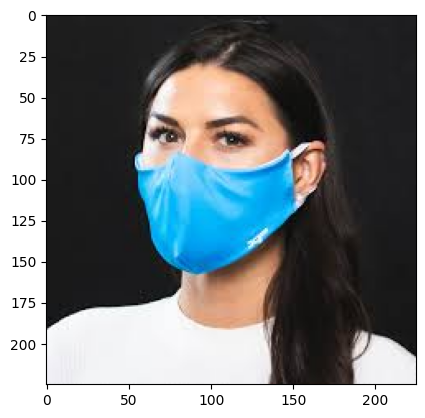

In [ ]:
# Display with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_822.jpg')
imgplot=plt.imshow(img)

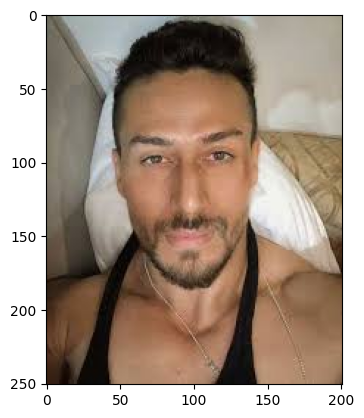

In [ ]:
img=mpimg.imread('/content/data/without_mask/without_mask_766.jpg')
imgplot=plt.imshow(img)

# Image Processing

In [ ]:
# converting images to nparray for faster processing
with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

array([[[157, 134,  93],
        [155, 132,  91],
        [152, 130,  88],
        ...,
        [106, 101,  76],
        [104, 100,  74],
        [104, 100,  73]],

       [[157, 135,  94],
        [154, 132,  92],
        [149, 127,  87],
        ...,
        [106, 101,  74],
        [106, 101,  74],
        [106, 101,  73]],

       [[145, 124,  87],
        [143, 122,  85],
        [139, 118,  81],
        ...,
        [105,  99,  71],
        [107, 101,  72],
        [107, 102,  73]],

       ...,

       [[141, 119,  84],
        [141, 119,  84],
        [140, 120,  83],
        ...,
        [ 38,  33,  29],
        [ 33,  29,  25],
        [ 31,  27,  23]],

       [[145, 122,  88],
        [144, 122,  87],
        [143, 122,  86],
        ...,
        [ 39,  35,  30],
        [ 36,  33,  28],
        [ 35,  32,  27]],

       [[149, 126,  92],
        [147, 124,  90],
        [142, 121,  85],
        ...,
        [ 40,  36,  32],
        [ 39,  35,  30],
        [ 38,  35,  30]]], dtype=uint8)
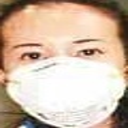

In [ ]:
data[10]

In [ ]:
type(data)

list

In [ ]:
type(data[10])

numpy.ndarray

In [ ]:
data[10].shape

(128, 128, 3)

In [ ]:
X=np.array(data)
y=np.array(labels)

In [ ]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Normalising
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
# CNN

In [ ]:
model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='sigmoid'))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 10s 18ms/step - loss: 0.4029 - accuracy: 0.8194 - val_loss: 0.3537 - val_accuracy: 0.8876
Epoch 2/10
170/170 [==============================] - 2s 12ms/step - loss: 0.2618 - accuracy: 0.8972 - val_loss: 0.2188 - val_accuracy: 0.9207
Epoch 3/10
170/170 [==============================] - 2s 12ms/step - loss: 0.2085 - accuracy: 0.9161 - val_loss: 0.1580 - val_accuracy: 0.9306
Epoch 4/10
170/170 [==============================] - 2s 13ms/step - loss: 0.1875 - accuracy: 0.9308 - val_loss: 0.1360 - val_accuracy: 0.9455
Epoch 5/10
170/170 [==============================] - 2s 14ms/step - loss: 0.1519 - accuracy: 0.9463 - val_loss: 0.1096 - val_accuracy: 0.9636
Epoch 6/10
170/170 [==============================] - 2s 12ms/step - loss: 0.1139 - accuracy: 0.9570 - val_loss: 0.1165 - val_accuracy: 0.9537
Epoch 7/10
170/170 [==============================] - 2s 11ms/step - loss: 0.0975 - accuracy: 0.9632 - val_loss: 0.1150 - val_accuracy: 0.963

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print('Test_accuracy: ',accuracy)
print('Test loss: ',loss)

48/48 [==============================] - 0s 9ms/step - loss: 0.1485 - accuracy: 0.9636
Test_accuracy:  0.9636002779006958
Test loss:  0.14852583408355713


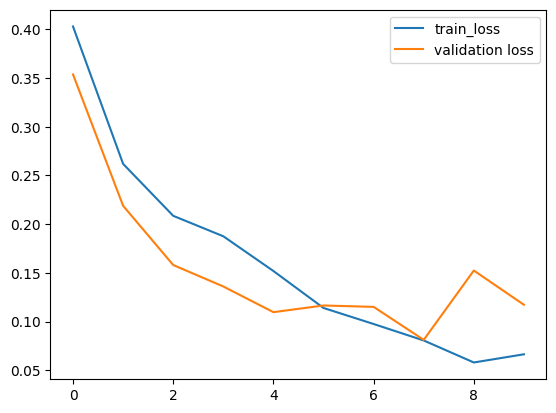

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

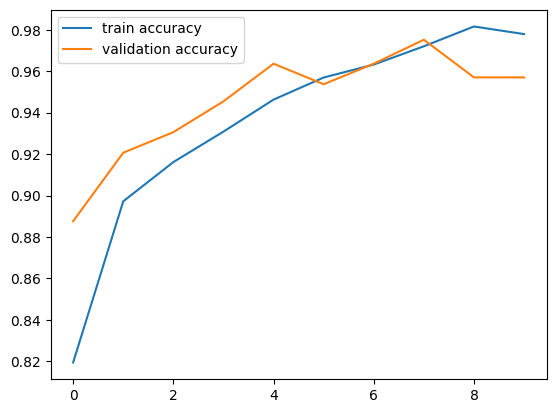

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
# prediction
def prediction():
  input_image_path=input('Enter The Path : ' )
  input_image=cv2.imread(input_image_path)
  cv2_imshow(input_image)
  input_image_resized=cv2.resize(input_image,(128,128))
  input_image_scaled=input_image_resized/255
  input_image_reshaped=np.reshape(input_image_scaled,(1,128,128,3))
  input_prediction=model.predict(input_image_reshaped)
  # print(input_prediction)
  input_pred_label=np.argmax(input_prediction)
  # print(input_pred_label)
  if input_pred_label==1:
    print('wearing_mask')
  else:
    print('Not wearing_mask')

In [ ]:
prediction()

Enter The Path : "D:\pic\afeef wed\DSC04803.JPG"


AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.4 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok opencv-python-headless

In [ ]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np

# Assuming `model` is already loaded elsewhere in your script
# For example, you might have a pre-trained Keras model
# model = ...

# Define prediction function
def prediction(image):
    input_image_resized = cv2.resize(image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)
    if input_pred_label == 1:
        return 'Wearing Mask'
    else:
        return 'Not Wearing Mask'

# Streamlit app
def main():
    st.title("Mask Detection App")

    # Upload image
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        # Convert the file to an OpenCV image
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        input_image = cv2.imdecode(file_bytes, 1)

        # Display the uploaded image
        st.image(input_image, channels="BGR", caption="Uploaded Image", use_column_width=True)

        # Make prediction
        result = prediction(input_image)
        st.write(f'Prediction: {result}')

if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Terminate open ngrok connections
ngrok.kill()

# Create a tunnel to the streamlit port
public_url = ngrok.connect(port='8501')
public_url


ERROR:pyngrok.process.ngrok:t=2024-05-19T06:43:11+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.